In [1]:
!git clone -l -s git://github.com/williamchand/bangkit_MLCC.git bangkit_MLCC
%cd bangkit_MLCC/dataset
!ls

Cloning into 'bangkit_MLCC'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 14 (delta 0), reused 14 (delta 0), pack-reused 0
Receiving objects: 100% (14/14), 30.12 MiB | 22.78 MiB/s, done.
/content/bangkit_MLCC/dataset
american_sign_language.PNG  amer_sign3.png	 sign_mnist_train.csv
amer_sign2.png		    sign_mnist_test.csv


In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd


In [3]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
        read_csv = csv.reader(training_file, delimiter=',')
        temp_images = []
        temp_labels = []
        first_row = True
        for row in read_csv:
            if first_row:
                first_row = False
            else:
                temp_labels.append(row[0])
                images_data = row[1:785]
                images_data_as_array = np.array_split(images_data, 28)
                temp_images.append(images_data_as_array)

        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
 
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images,axis=3)# Your Code Here
testing_images = np.expand_dims(testing_images,axis=3)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255.0)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [5]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

train_generator = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=32)
validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=32)

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_generator, epochs=10, validation_data = validation_generator)

model.evaluate(testing_images, testing_labels, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
858/858 [==============================] - 9s 11ms/step - loss: 2.5866 - accuracy: 0.1895 - val_loss: 1.6655 - val_accuracy: 0.4353
Epoch 2/10
858/858 [==============================] - 9s 11ms/step - loss: 1.4994 - accuracy: 0.4843 - val_loss: 1.2549 - val_accuracy: 0.5347
Epoch 3/10
858/858 [==============================] - 9s 11ms/step - loss: 1.1646 - accuracy: 0.5948 - val_loss: 1.0159 - val_accuracy: 0.6301
Epoch 4/10
858/858 [==============================] - 9s 11ms/step - loss: 0.9401 - accuracy: 0.6744 - val_loss: 0.8248 - val_accuracy: 0.7011
Epoch 5/10
858/858 [==============================] - 9s 11ms/step - loss: 0.8254 - accuracy: 0.7131 - val_loss: 0.8232 - val_accuracy: 0.7135
Epoch 6/10
858/858 [==============================] - 9s 11ms/step - loss: 0.7164 - accuracy: 0.7463 - val_loss: 0.6269 - val_accuracy: 0.7872
Epoch 7/10
858/858 [==============================] - 9s 11ms/step

[237.78977966308594, 0.5645565986633301]

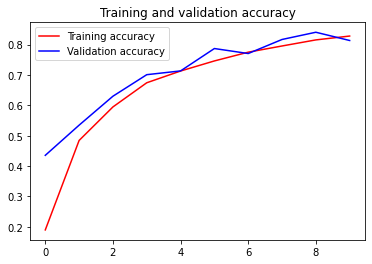

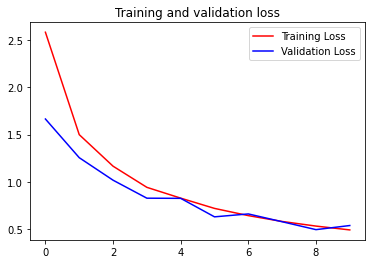

In [6]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()